In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
content=pd.read_csv("Content.csv")
content.head(5)


,Unnamed: 0,content_id,user_id,content_type,category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


In [3]:
content.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   content_id    1000 non-null   object
 2   user_id       1000 non-null   object
 3   content_type  1000 non-null   object
 4   category      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [4]:
content.shape

(1000, 5)

In [5]:
content.isnull().sum() # no null values in the dataset

Unnamed: 0      0
content_id      0
user_id         0
content_type    0
category        0
dtype: int64

In [6]:
content=content.drop_duplicates()
content.shape

(1000, 5)

In [7]:
content=content.drop(["Unnamed: 0","user_id"],axis=1)
content.head(2)


,content_id,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating


In [8]:
reaction=pd.read_csv("Reactions.csv")
reaction.head(5)


,Unnamed: 0,content_id,user_id,type,datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,11/7/2020 9:43
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,6/17/2021 12:22
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,4/18/2021 5:13
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,1/6/2021 19:13
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,8/23/2020 12:25


In [9]:
reaction.shape


(22534, 5)

In [10]:
reaction.isnull().sum()

Unnamed: 0    0
content_id    0
user_id       0
type          0
datetime      0
dtype: int64

In [11]:
reaction=reaction.drop_duplicates()
reaction.head(5)
print("/n")
reaction.shape   # No duplicates values exist in our dataset.

/n


(22534, 5)

In [12]:
reaction=reaction.drop(["Unnamed: 0","user_id"],axis=1)
reaction.head(2)


,content_id,type,datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22


In [13]:
reaction_type=pd.read_csv("ReactionTypes.csv")
reaction_type.head(5)

,Unnamed: 0,type,sentiment,score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [14]:
reaction_type=reaction_type.drop("Unnamed: 0",axis=1)
reaction_type.head()


,type,sentiment,score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [15]:
reaction_type.shape

(16, 3)

In [16]:
reaction_type.isnull().sum()


type         0
sentiment    0
score        0
dtype: int64

In [17]:
reaction_type=reaction_type.drop_duplicates()
reaction_type.shape

(16, 3)

In [18]:
reaction.head()

,content_id,type,datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25


In [19]:
reaction["datetime"]=pd.to_datetime(reaction["datetime"])
reaction.head(2)


,content_id,type,datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:00
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00


In [20]:
reaction['datetime'] = reaction['datetime'].dt.date
reaction.head()

,content_id,type,datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23


In [21]:
reaction.head(1)


,content_id,type,datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07


In [22]:
content.head(1)


,content_id,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying


In [23]:
merged_df = pd.merge(reaction, content,on="content_id",how="left")
merged_df


,content_id,type,datetime,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,Studying
...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31,audio,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27,audio,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16,audio,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04,audio,technology


In [24]:
merged_df=merged_df.drop_duplicates()
merged_df

,content_id,type,datetime,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,Studying
...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31,audio,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27,audio,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16,audio,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04,audio,technology


In [25]:
merged_df.isnull().sum()

content_id      0
type            0
datetime        0
content_type    0
category        0
dtype: int64

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22486 entries, 0 to 22533
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content_id    22486 non-null  object
 1   type          22486 non-null  object
 2   datetime      22486 non-null  object
 3   content_type  22486 non-null  object
 4   category      22486 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [27]:
merged_df["datetime"]=pd.to_datetime(merged_df["datetime"])
merged_df


C:\Users\Fahad Khan\AppData\Local\Temp\ipykernel_1708\1792197588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["datetime"]=pd.to_datetime(merged_df["datetime"])


,content_id,type,datetime,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,Studying
...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31,audio,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27,audio,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16,audio,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04,audio,technology


In [28]:
merged_df["category"]=merged_df["category"].str.lower()

C:\Users\Fahad Khan\AppData\Local\Temp\ipykernel_1708\1140588745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["category"]=merged_df["category"].str.lower()


In [29]:
merged_df

,content_id,type,datetime,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,studying
...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31,audio,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27,audio,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16,audio,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04,audio,technology


In [30]:
reaction_type.head()

,type,sentiment,score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [31]:
df2=pd.merge(merged_df,reaction_type,on="type",how="left")
df2


,content_id,type,datetime,content_type,category,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,studying,positive,30
...,...,...,...,...,...,...,...
22481,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31,audio,technology,negative,12
22482,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27,audio,technology,negative,10
22483,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16,audio,technology,positive,45
22484,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04,audio,technology,negative,12


In [32]:
df2.drop_duplicates()
df2

,content_id,type,datetime,content_type,category,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,studying,positive,30
...,...,...,...,...,...,...,...
22481,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31,audio,technology,negative,12
22482,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27,audio,technology,negative,10
22483,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16,audio,technology,positive,45
22484,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04,audio,technology,negative,12


In [33]:
# We have to find the top 5 content category based on their score
agg_df = df2.groupby('category').agg({'score': 'sum'}).reset_index()

top_5=agg_df.sort_values(by="score",ascending=False).head(5)

top_5

,category,score
0,animals,68207
9,science,65360
12,technology,62960
7,healthy eating,62779
6,food,61408


## How many unique category of the content is avavible on Social Buzz?


In [34]:
merged_df["category"].nunique()

16

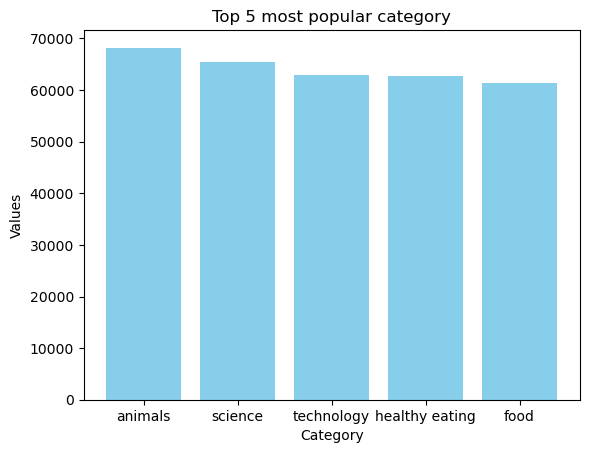

In [35]:
plt.bar(top_5["category"],top_5["score"],color="skyblue")
plt.xlabel("Category")
plt.ylabel("Values")
plt.title("Top 5 most popular category")
plt.show()

## Now let see which months has the most number of posts.

In [36]:
merged_df.head()

,content_id,type,datetime,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,studying


In [37]:
merged_df["months"]=merged_df["datetime"].dt.month_name()
merged_df

C:\Users\Fahad Khan\AppData\Local\Temp\ipykernel_1708\3239612870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["months"]=merged_df["datetime"].dt.month_name()


,content_id,type,datetime,content_type,category,months
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,studying,November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,studying,June
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,studying,April
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,studying,January
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,studying,August
...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31,audio,technology,October
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27,audio,technology,June
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16,audio,technology,February
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04,audio,technology,November


In [45]:
most_post = merged_df.groupby("months").agg(month_count=("months", "count")).reset_index()

post_per_month=most_post.sort_values(by="month_count",ascending=False)
post_per_month

,months,month_count
4,January,1948
8,May,1948
1,August,1942
2,December,1935
10,October,1885
5,July,1878
9,November,1859
11,September,1859
7,March,1854
6,June,1833


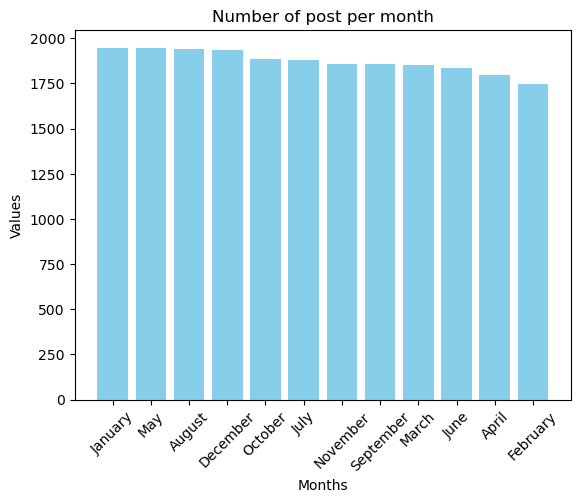

In [48]:
plt.bar(post_per_month["months"],post_per_month["month_count"],color="skyblue")
plt.xticks(rotation=45)
plt.title("Number of post per month")
plt.xlabel("Months")
plt.ylabel("Values")
plt.show()